<h1><center>Capstone Project - The Battle of Neighborhoods (Week 2)</center></h1>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

With this project we aim to create a product pilot that will help our retail and trade customers to identify business opportunities and underexplored locations in line with their line of business. We want to analyze business oportunities in the city of Belo Horizonte, state of Minas Gerais, Brazil. As a company of analytics we want to provide a product that will help customers of diverse business areas to identify competitors and opportunities for new store openings.

This report will be targeted to local business and multinational franchises, interested in opening drugstores, restaurants to for an area with high population density and low supply of services.

Since there may already be strong competitors in these areas, the creation of a map that demonstrates the population density of each neighborhood and the subsequent market analysis of that region will give us a strategic view of how and which business to position in the respective area.

## Data <a name="data"></a>

The data that its being used to solve the problem and generate this product will be from the webnode web page, with neighborhood of the City of Belo Horizonte with their respective population. These data were obtained from IBGE, which is the Brazilian Institute of Geography and Statistics, which is a public institute of the Brazilian federal administration. Also Foursquare will be used to obtain business data from these neighborhoods for market evaluation of each sector obtained.

The links are:

https://bairrosdebelohorizonte.webnode.com.br/popula%c3%a7%c3%a3o%20dos%20bairros-censo%202010%20ibge-/
https://bairrosdebelohorizonte.webnode.com.br/bairros%20por%20popula%c3%a7%c3%a3o%2c%20censo%20ibge%202010%2c%20parte%20ii-/
https://bairrosdebelohorizonte.webnode.com.br/bairros%20por%20popula%c3%a7%c3%a3o%2c%20censo%202010%2c%20ibge%2c%20parte%20iii-/

The image below shows how the data is available on the page.

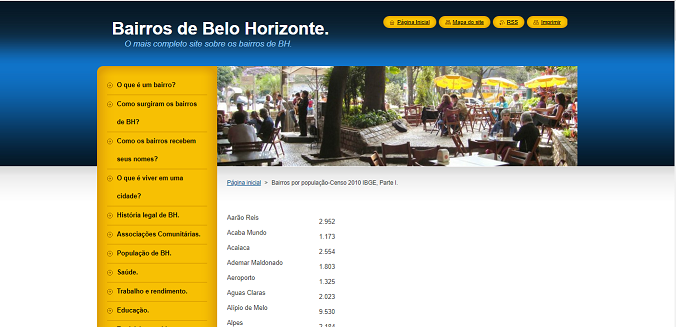

Based on definition of our problem, factors that will influence our decission are:
<ol>
<li>Number of venues in the areas with high population density</li>
<li>Number of drogstores in areas with high pouplation density</li>
</ol>

Following data sources extraction of the webpage links, will we need to populate the geographical coordinates (Latitude and Longitude) of the neighborhood extracted. For this we will use the geopy library in a loop to obtain these data to each neighborhood.

The IBGE data on neighborhoods and their population are stored on three separate pages. Then each will be loaded into a separate url variable below.

In [5]:
# Variables with the URLs.
url1 = "https://bairrosdebelohorizonte.webnode.com.br/popula%c3%a7%c3%a3o%20dos%20bairros-censo%202010%20ibge-/"
url2 = "https://bairrosdebelohorizonte.webnode.com.br/bairros%20por%20popula%c3%a7%c3%a3o%2c%20censo%20ibge%202010%2c%20parte%20ii-/"
url3 = "https://bairrosdebelohorizonte.webnode.com.br/bairros%20por%20popula%c3%a7%c3%a3o%2c%20censo%202010%2c%20ibge%2c%20parte%20iii-/"

Importing pandas library to import the urls and generate the dataframe.

In [6]:
# library for data analsysis
import pandas as pd 

Reads the urls with neighborhood and population data and stores it in the list.

In [3]:
list1 = pd.read_html(url1)
list2 = pd.read_html(url2)
list3 = pd.read_html(url3)

Import lists to dataframe and Define columns names

In [13]:
df1 = list1[0]
df2 = list2[0]
df3 = list3[0]

In [14]:
df1.columns = ['Neighborhood', 'Population']
df2.columns = ['Neighborhood', 'Population']
df3.columns = ['Neighborhood', 'Population']

Merge all three dataframes with data loaded into a single dataframe.

In [15]:
df = pd.concat([df1, df2, df3], ignore_index=True)

Checking the size and quantity of dataframe columns.

In [16]:
df.shape

(482, 2)

Checking the data.

In [17]:
df.head()

,Neighborhood,Population
0,Aarão Reis,2.952
1,Acaba Mundo,1.173
2,Acaiaca,2.554
3,Ademar Maldonado,1.803
4,Aeroporto,1.325


Now we can see data from neighborhoods of the city of Belo Horizonte, with their respective population density in the dataframe. All data from the three links were concatenated into a single dataframe called df.

## Methodology <a name="methodology"></a>


In this project we will take two approaches in the first one, we will explore on a map the neighborhoods with the highest population density and analyze the types of businesses that predominate in a given neighborhood and which type of business is lacking in the same region, few occurrences or lack of Business is the first step in continuing our investigation. In order to do this we will extract data from webnode webpage with IBGE's data, The resulting dataframe will have the following columns 'Neighborhood', 'Population', 'Latitude','Longitude'. These columns, latitude and longitude, will be populated by the location obtained by geopy.

We will also cluster the types of venues to identify patterns as well as the predominance of business types in clusters. Another map will contain the neighborhoods of the Belo Horizonte city with the size of the bubbles accordind with the total population of it.
With the visualization we wait to see neighborhoods with a higher population density with need of a lack of services or conveniences, such as drugstore.

Then we choose one neighborhood with more dense population to examine the venues, to search oportunities in this neighborhood.

So we have collected the required data, neighborhoods with their respective population density. Than we will do exploration with maps, plots and ranking to understand the scenario and how the venues/business are distributed through the neighborshod.

At least we will clusters of the venues of the neighborhoods and than analyze and then analyze each cluster to identify opportunities in each area.

<h6>Install required packages</h6>

In [18]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

In [19]:
!conda install -c conda-forge geopy --yes 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.20.0         | 57 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [20]:
!conda install -c conda-forge wordcloud==1.4.1 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


<h6>Import required libraries</h6>

In [42]:
# Library  for scientific computing
import numpy as np

import folium # plotting library

import requests # library to handle requests

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# Import wordclouds
from wordcloud import WordCloud, STOPWORDS

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In order to merge the data from the three dataframes containing the data from the three links we will create a new dataframe.

Then we create the dfbh dataframe with the columns:
'Neighborhood', 'Population', 'Latitude','Longitude'

This dataframe will contain data extracted from the webnode site recorded on df dataframe, including two new columns, latitude and longitude. These columns will be populated by the location obtained by geopy.

In [22]:
cols = ['Neighborhood', 'Population', 'Latitude','Longitude']
dfbh = pd.DataFrame(columns = cols)

Use geopy library to get the latitude and longitude values of the neighborhoods of Belo Horizonte City.

In [23]:
geolocator = Nominatim(user_agent="coursera_agent")

Get Belo Horizonte data, neighborhood, latitude and longitue.
Here we will loop through the df dataframe, forming the full address of the neighborhood and then getting the corrords through geopy, as soon as this data is obtained the new dfbh dataframe will be recorded with the new columns.

In [ ]:
for neighborhood, population in zip(df['Neighborhood'], df['Population']):
    address = neighborhood + ', Belo Horizonte, Minas Gerais, Brasil'
    location = geolocator.geocode(address, timeout=None)
    if location != None:
        latitude = location.latitude
        longitude = location.longitude
        dfbh = dfbh.append({'Neighborhood': neighborhood,'Population': population, 'Latitude': latitude, 'Longitude': longitude },ignore_index=True)

In [27]:
dfbh.shape

(103, 4)

Here a simple test to see if the central neighborhood was recorded.

In [28]:
test = dfbh['Neighborhood'] == 'Centro'

In [29]:
test2 = dfbh[test]

In [30]:
test2

,Neighborhood,Population,Latitude,Longitude
69,Centro,16.199,-19.919331,-43.940349


Drop the population data with no data signal and converts to numeric.

In [31]:
dfbh['Population'] = pd.to_numeric(dfbh['Population'].replace("-",""))

In [32]:
dfbh.head()

,Neighborhood,Population,Latitude,Longitude
0,Aarão Reis,2.952,-19.847221,-43.919508
1,Aarão Reis,2.952,-19.847221,-43.919508
2,Acaba Mundo,1.173,-19.961333,-43.928769
3,Acaiaca,2.554,-19.844662,-43.894791
4,Ademar Maldonado,1.803,-19.981895,-44.026621


Below we can see that the population column isn't with integer data type, than we will need to convert it to use in the map then.

In [33]:
print (dfbh.dtypes)

Neighborhood     object
Population      float64
Latitude        float64
Longitude       float64
dtype: object


In [34]:
# Backups the data extracted for safety.
dfbh.to_pickle('\bhdata.pkl')

In [21]:
# Restores data if needed
#dfbh = pd.read_pickle('\bhdata.pkl')

<h5>The map bellow shows the neighborhoods of the Belo Horizonte city with the size of the bubbles accordind with the total population of it.</h5>
Note that the population data was divided by 100 to adjust the scale of the bubble in the map.

In [35]:
# create map of belo horizonte using latitude and longitude values
map_bh = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, pop in zip(dfbh['Latitude'], dfbh['Longitude'], dfbh['Neighborhood'], dfbh['Population']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= pop/100, #divides by 100 to adjust the scale.
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bh)
    
map_bh

With this visualization we can observe that there are neighborhoods with a much higher population density than the others and also that these neighborhoods are not central (city center), so let's examine if the venues of these neighborhoods to check if the lack of any service or convenience such as drugstore previously cited.

<h5>Then we choose one neighborhood with more dense population to examine the venues, to search oportunities in this neighborhood.</h5>

In [36]:
dfanalyzeneig = dfbh[dfbh['Neighborhood'] == 'Conjunto Floramar'].reset_index(drop=True)
dfanalyzeneig.head()

,Neighborhood,Population,Latitude,Longitude
0,Conjunto Floramar,916.0,-19.829952,-43.931366


Below we will get the neighborhood coordinates to examine their venues.

In [37]:
# Get Conjunto's Floramar data
neighborhood_name = dfanalyzeneig.loc[0, 'Neighborhood']
neighborhood_latitude = dfanalyzeneig.loc[0, 'Latitude'] 
neighborhood_longitude = dfanalyzeneig.loc[0, 'Longitude'] 

In [38]:
print(neighborhood_latitude) #just checking if tha data was returned

-19.8299524


### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on venues in each neighborhood. And use the power of Foursquare to help us examine the types of businesses prevalent in this densely populated neighborhood to check for opportunities.

In [39]:
CLIENT_ID = 'LYCIWPP3QG5U4FTYOA5S2KJHYIRBHHTNHKHILJ2U2KUAVDW4' # your Foursquare ID
CLIENT_SECRET = 'OFAVRJSVMWJRBS5TFNTD21CLO44BJDAXSMLG4ZPRQPB3RMHM' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LYCIWPP3QG5U4FTYOA5S2KJHYIRBHHTNHKHILJ2U2KUAVDW4
CLIENT_SECRET:OFAVRJSVMWJRBS5TFNTD21CLO44BJDAXSMLG4ZPRQPB3RMHM


Now, let's get the top 100 venues that are in Conjunto Floramar within a radius of 1000 meters.

In [43]:
LIMIT = 100
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=LYCIWPP3QG5U4FTYOA5S2KJHYIRBHHTNHKHILJ2U2KUAVDW4&client_secret=OFAVRJSVMWJRBS5TFNTD21CLO44BJDAXSMLG4ZPRQPB3RMHM&v=20180604&ll=-19.8299524,-43.9313660286868&radius=1000&limit=100'

In [44]:
results = requests.get(url).json()
#results

In [45]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Let's generate a dataframe with categories venues 

In [46]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Academia.com,Gym / Fitness Center,-19.828606,-43.931507
1,Centro Poliesportivo Padre Virgílio Resi,Soccer Field,-19.830447,-43.931754
2,Supermine Pão D'Luz,Bakery,-19.831148,-43.936590
3,Supermercado Vem Que Tem,Supermarket,-19.830397,-43.932106
4,Bar do Careca,Seafood Restaurant,-19.828909,-43.939082


Now let's verify how much venues were returned for this neighborhood.

In [47]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

54 venues were returned by Foursquare.


Let's plot the data to visualize the venues of this densely populated neighborhood to understand the predominant businesses in the area.

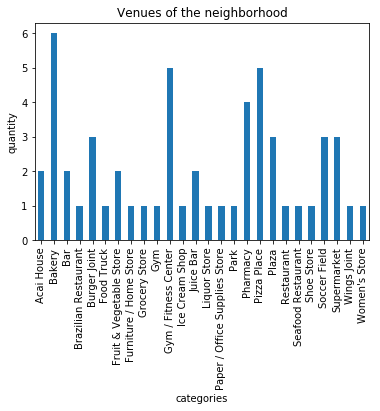

In [48]:
nearby_venues.groupby('categories')['name'].nunique().plot(kind='bar')

plt.xlabel('categories') # add to x-label to the plot
plt.ylabel('quantity') # add y-label to the plot
plt.title('Venues of the neighborhood') # add title to the plot

plt.show()

We can  see that four drugstores (Pharmacy) was found in the neighborhhod with high populaion density. So to a neighborhood with so high population density, we should investigate whether four drugstores will meet the needs of the neighborhood. It also makes it compatible with other neighborhoods.

<h5>Now lets get the venues of all neighborhood of Belo Horizonte city</h5>

In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Below we created a new dataframe with the venues of each neighborhood of the whole city of Belo Horizonte.

In [50]:
bh_venues = getNearbyVenues(names=dfbh['Neighborhood'],
                                   latitudes=dfbh['Latitude'],
                                   longitudes=dfbh['Longitude']
                                  )

Aarão Reis
Aarão Reis
Acaba Mundo
Acaiaca
Ademar Maldonado
Aeroporto
Aguas Claras
Alípio de Melo
Alpes
Alto Barroca
Alto das Antenas
Alto dos Pinheiros
Alto Vera Cruz
Álvaro Camargos
Ambrosina
Anchieta
Andiroba
Aparecida
Aparecida 7ª Seção
Ápia
Apolonia
Araguaia
Atila de Paiva
Bacurau
Bairro das Indústrias II
Baleia
Bandeirantes
Barreiro
Barro Preto
Barroca
Beija Flor
Bela Vitoria
Belmonte
Belvedere
Bernadete
Betânia
Biquinhas
Boa Esperança
Boa Viagem
Boa Vista
Bom Jesus
Bonfim
Bonsucesso
Brasil Industrial
Braúnas
Buritis
Cabana do Pai Tomás
Cachoeirinha
Caetano Furquim
Caiçara - Adelaide
Caiçaras
Calafate
Califórnia
Camargos
Campo Alegre
Camponesa 1ª Seção
Camponesa 2ª Seção
Canaa
Canadá
Candelaria
Capitão Eduardo
Cardoso
Carlos Prates
Carmo
Casa Branca
Castanheira
Castelo
CDI Jatoba
Cenaculo
Centro
Céu Azul
Chácara Leonina
Cidade Jardim
Cidade Jardim Taquaril
Cidade Nova
Cinquentenário
Colégio Batista
Comiteco
Concórdia
Confisco
Conjunto Bonsucesso
Conjunto Califórnia I
Conjunto Cali

In [51]:
print(bh_venues.shape)
bh_venues.head()

(2065, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarão Reis,-19.847221,-43.919508,Pratique Fitness,-19.843478,-43.918445,Gymnastics Gym
1,Aarão Reis,-19.847221,-43.919508,Chapa Mágica,-19.845448,-43.921754,BBQ Joint
2,Aarão Reis,-19.847221,-43.919508,Pub do Beto,-19.844078,-43.921322,Pub
3,Aarão Reis,-19.847221,-43.919508,Supermercado Convem,-19.843711,-43.918193,Supermarket
4,Aarão Reis,-19.847221,-43.919508,Burger King,-19.846823,-43.919360,Fast Food Restaurant


## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's count the number of venues in each neighborhood. See how many venues were returned for each neighborhood.

In [52]:
bh_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aarão Reis,24,24,24,24,24,24
Acaba Mundo,7,7,7,7,7,7
Acaiaca,26,26,26,26,26,26
Ademar Maldonado,18,18,18,18,18,18
Aeroporto,6,6,6,6,6,6
Alpes,12,12,12,12,12,12
Alto Barroca,36,36,36,36,36,36
Alto Vera Cruz,19,19,19,19,19,19
Alto das Antenas,8,8,8,8,8,8


Now let's do a ranking to check the most comom/frequent venues were returned for each neighborhood.

In [53]:
bh_venues["Rank"] = bh_venues["Venue Category"].rank() 

In [54]:
bh_venues.sort_values("Venue Category", inplace = True) 

In [55]:
bh_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Rank
569,Betânia,-19.958611,-43.992225,Ponto K Açaí,-19.960447,-43.991081,Acai House,5.5
60,Ademar Maldonado,-19.981895,-44.026621,Açaí Bom D+,-19.977906,-44.025865,Acai House,5.5
904,Caiçara - Adelaide,-19.905134,-43.974987,Açai Mix,-19.905150,-43.972242,Acai House,5.5
328,Araguaia,-19.988673,-44.002195,Varanda do Açai,-19.986204,-44.004265,Acai House,5.5
329,Araguaia,-19.988673,-44.002195,Açai Brasil,-19.989865,-44.001474,Acai House,5.5


In [57]:
dfanalyzeven = bh_venues[bh_venues['Rank'] <= 50].reset_index(drop=True)
bh_venues.sort_values("Rank", inplace = True) 
dfanalyzeven.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Rank
0,Betânia,-19.958611,-43.992225,Ponto K Açaí,-19.960447,-43.991081,Acai House,5.5
1,Ademar Maldonado,-19.981895,-44.026621,Açaí Bom D+,-19.977906,-44.025865,Acai House,5.5
2,Caiçara - Adelaide,-19.905134,-43.974987,Açai Mix,-19.905150,-43.972242,Acai House,5.5
3,Araguaia,-19.988673,-44.002195,Varanda do Açai,-19.986204,-44.004265,Acai House,5.5
4,Araguaia,-19.988673,-44.002195,Açai Brasil,-19.989865,-44.001474,Acai House,5.5


<h4>Now let's analyze the top Venues in the City.</h4>

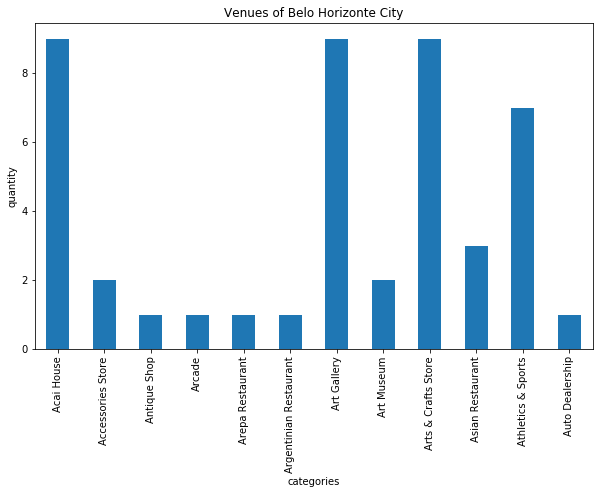

In [58]:
dfanalyzeven.groupby('Venue Category')['Venue'].nunique().plot(kind='bar',figsize=(10, 6))

plt.xlabel('categories') # add to x-label to the plot
plt.ylabel('quantity') # add y-label to the plot
plt.title('Venues of Belo Horizonte City') # add title to the plot

plt.show()

In [50]:
print('There are {} uniques categories.'.format(len(bh_venues['Venue Category'].unique())))

There are 224 uniques categories.


Above we can observe that drogstores is not the most common venue of the neighborshood of this city. The most common venues are: "Acai House", "Art Gallaery", "Arts & Crafts Store" and "Athletics & Sports"."

Analizing each cateogry:

In [59]:
# one hot encoding
bh_onehot = pd.get_dummies(bh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bh_onehot['Neighborhood'] = bh_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bh_onehot.columns[-1]] + list(bh_onehot.columns[:-1])
bh_onehot = bh_onehot[fixed_columns]

bh_onehot.head()

,Neighborhood,Acai House,Accessories Store,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Warehouse Store,Watch Shop,Water Park,Wine Bar,Women's Store,Yoga Studio
569,Betânia,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1826,Conjunto Serra Verde,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901,Coração de Jesus,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348,Atila de Paiva,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,Aparecida,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


By the graph and this table we can see that "Açai Houses" have a heavily exploited and perhaps saturated market, this type of business will require a lot of knowhow and high risk of competition.

In [60]:
bh_onehot.shape

(2065, 234)

In [61]:
bh_grouped = bh_onehot.groupby('Neighborhood').mean().reset_index()
bh_grouped

,Neighborhood,Acai House,Accessories Store,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Warehouse Store,Watch Shop,Water Park,Wine Bar,Women's Store,Yoga Studio
0,Aarão Reis,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,Acaba Mundo,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,Acaiaca,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,Ademar Maldonado,0.055556,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,Aeroporto,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.0,0.000000,0.000000
5,Alpes,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,Alto Barroca,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.027778,0.000000
7,Alto Vera Cruz,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8,Alto das Antenas,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,Alto dos Pinheiros,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [62]:
bh_grouped.shape

(98, 234)

In [63]:
num_top_venues = 5

for hood in bh_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bh_grouped[bh_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aarão Reis----
                  venue  freq
0          Burger Joint  0.25
1        Gymnastics Gym  0.08
2           Supermarket  0.08
3  Fast Food Restaurant  0.08
4         Shopping Mall  0.08


----Acaba Mundo----
                     venue  freq
0                    Plaza  0.29
1               Racecourse  0.14
2               Food Truck  0.14
3  Comfort Food Restaurant  0.14
4                    River  0.14


----Acaiaca----
         venue  freq
0  Pizza Place  0.12
1    Juice Bar  0.08
2  Snack Place  0.08
3       Bakery  0.08
4     Pharmacy  0.08


----Ademar Maldonado----
                  venue  freq
0                Bakery  0.11
1      Sushi Restaurant  0.11
2  Fast Food Restaurant  0.11
3                   Bar  0.11
4    Mineiro Restaurant  0.06


----Aeroporto----
                  venue  freq
0                Office  0.33
1            Food Truck  0.17
2            Water Park  0.17
3              Boutique  0.17
4  Gym / Fitness Center  0.17


----Alpes----
              

Let's put that into a pandas dataframe

In [64]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [65]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bh_grouped['Neighborhood']

for ind in np.arange(bh_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bh_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarão Reis,Burger Joint,Gymnastics Gym,Shopping Mall,Pool,Pub,Flower Shop,BBQ Joint,Fast Food Restaurant,Supermarket,Gym / Fitness Center
1,Acaba Mundo,Plaza,Racecourse,Food Truck,Comfort Food Restaurant,River,Snack Place,Electronics Store,Flower Shop,Flea Market,Fish & Chips Shop
2,Acaiaca,Pizza Place,Bakery,Pharmacy,Juice Bar,Snack Place,Market,BBQ Joint,Motorcycle Shop,Sandwich Place,Supermarket
3,Ademar Maldonado,Fast Food Restaurant,Bar,Bakery,Sushi Restaurant,Acai House,Gastropub,Furniture / Home Store,Mineiro Restaurant,Gym,Paper / Office Supplies Store
4,Aeroporto,Office,Food Truck,Water Park,Boutique,Gym / Fitness Center,Yoga Studio,Fish & Chips Shop,Farm,Farmers Market,Fast Food Restaurant


<h4>Now we will plot a Word cloud to see the most common venues and the least of the city of Belo Horizonte.</h4>

Reading the column "Venue Category" and transforming it into a text variable and than ploting the word cloud to help to visualize the most common venues.

In [116]:
bhvenuesstr = str(bh_venues["Venue Category"].values)

In [117]:
type(bhvenuesstr)

str

In [118]:
bh_wc = WordCloud(
    background_color='white',
    max_words=2000
)

# generate the word cloud
bh_wc.generate(bhvenuesstr)

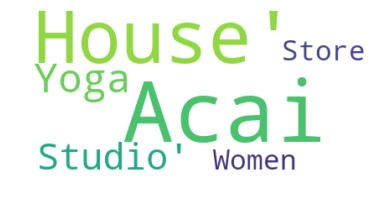

In [119]:
# display the word cloud
plt.imshow(bh_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Here we can confimr that "Acai House" its very popular in all the City.

## K-Means <a name="K-Means"></a>

Now we will cluster the Neighborhhods of those venues to create centers of zones containing good locations.

In [120]:
# set number of clusters
kclusters = 7
bh_grouped_clustering = bh_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([3, 6, 1, 1, 3, 3, 1, 1, 6, 3, 1, 1, 1, 0, 1, 3, 3, 1, 0, 1],
      dtype=int32)

In [121]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
bh_merged = dfbh
bh_merged = bh_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bh_merged.head()

,Neighborhood,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarão Reis,2.952,-19.847221,-43.919508,3.0,Burger Joint,Gymnastics Gym,Shopping Mall,Pool,Pub,Flower Shop,BBQ Joint,Fast Food Restaurant,Supermarket,Gym / Fitness Center
1,Aarão Reis,2.952,-19.847221,-43.919508,3.0,Burger Joint,Gymnastics Gym,Shopping Mall,Pool,Pub,Flower Shop,BBQ Joint,Fast Food Restaurant,Supermarket,Gym / Fitness Center
2,Acaba Mundo,1.173,-19.961333,-43.928769,6.0,Plaza,Racecourse,Food Truck,Comfort Food Restaurant,River,Snack Place,Electronics Store,Flower Shop,Flea Market,Fish & Chips Shop
3,Acaiaca,2.554,-19.844662,-43.894791,1.0,Pizza Place,Bakery,Pharmacy,Juice Bar,Snack Place,Market,BBQ Joint,Motorcycle Shop,Sandwich Place,Supermarket
4,Ademar Maldonado,1.803,-19.981895,-44.026621,1.0,Fast Food Restaurant,Bar,Bakery,Sushi Restaurant,Acai House,Gastropub,Furniture / Home Store,Mineiro Restaurant,Gym,Paper / Office Supplies Store


Excluding data with no data.

In [122]:
bh_merged = bh_merged.dropna()

Converting column Cluster Labels to integer to be able to plot these data in graph.

In [123]:
bh_merged["Cluster Labels"]= bh_merged["Cluster Labels"].astype(int)

In [124]:
print(bh_merged.dtypes)

Neighborhood               object
Population                float64
Latitude                  float64
Longitude                 float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object


In [125]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

cluster = 0

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bh_merged['Latitude'], bh_merged['Longitude'], bh_merged['Neighborhood'], bh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3>Examining Clusters</h3>

<h3>First Cluster</h3>

In [139]:
bh_merged.loc[bh_merged['Cluster Labels'] == 0, bh_merged.columns[[1] + list(range(5, bh_merged.shape[1]))]]

,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,9.804,Bakery,Bar,Plaza,Ice Cream Shop,Auto Garage,Print Shop,Pharmacy,Restaurant,Farmers Market,Fast Food Restaurant
23,104.000,Bakery,Burger Joint,Plaza,Gym / Fitness Center,Auto Garage,Brazilian Restaurant,Shoe Store,Fast Food Restaurant,Go Kart Track,Ice Cream Shop
36,1.671,Bakery,Paper / Office Supplies Store,Soccer Field,Gym / Fitness Center,Ice Cream Shop,Arcade,Snack Place,Flower Shop,Flea Market,Event Service
46,17.994,Bakery,Burger Joint,Snack Place,Fruit & Vegetable Store,Brazilian Restaurant,Gym / Fitness Center,Pet Store,Pharmacy,Gymnastics Gym,Art Gallery
54,2.774,Bakery,Gym / Fitness Center,BBQ Joint,Plaza,Pizza Place,Ice Cream Shop,Bar,Sushi Restaurant,Supermarket,Steakhouse
68,2.273,Bakery,Gym / Fitness Center,Stables,Discount Store,Bridal Shop,Motorcycle Shop,Park,Dumpling Restaurant,Grocery Store,Gym
70,23.793,Bakery,Soccer Field,Food Truck,Pizza Place,Health & Beauty Service,Bookstore,Spa,Music Store,Flower Shop,Food
79,4.283,Bakery,Ice Cream Shop,Health & Beauty Service,Athletics & Sports,Café,Plaza,Construction & Landscaping,Pizza Place,Food Truck,Latin American Restaurant
81,3.347,Gym / Fitness Center,Motel,Bakery,Ice Cream Shop,Plaza,Dessert Shop,Bar,BBQ Joint,Brewery,Health & Beauty Service
91,252.000,Burger Joint,Brazilian Restaurant,Supermarket,Bakery,Snack Place,Juice Bar,Irish Pub,Spa,Plaza,Food


<h3>1º segment of business</h3>

In this cluster we see the trend to allocate bakeries, so for a client in this branch we will select a neighborhood in this segment with high population density.


<h3>Second Cluster</h3>

In [140]:
bh_merged.loc[bh_merged['Cluster Labels'] == 1, bh_merged.columns[[1] + list(range(5, bh_merged.shape[1]))]]

,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,2.554,Pizza Place,Bakery,Pharmacy,Juice Bar,Snack Place,Market,BBQ Joint,Motorcycle Shop,Sandwich Place,Supermarket
4,1.803,Fast Food Restaurant,Bar,Bakery,Sushi Restaurant,Acai House,Gastropub,Furniture / Home Store,Mineiro Restaurant,Gym,Paper / Office Supplies Store
7,9.530,Bar,BBQ Joint,Bakery,Plaza,Beer Garden,Pizza Place,Burger Joint,Ice Cream Shop,Warehouse Store,Martial Arts Dojo
9,5.209,Bar,Bakery,Pizza Place,Flower Shop,Dessert Shop,Burger Joint,Fruit & Vegetable Store,Brazilian Restaurant,Mineiro Restaurant,Buffet
12,21.444,Burger Joint,Pizza Place,Ice Cream Shop,Soccer Field,Plaza,Liquor Store,Pool,Brazilian Restaurant,Beer Garden,Market
14,800.000,Bar,Burger Joint,Print Shop,Gym / Fitness Center,Motorcycle Shop,Snack Place,Brazilian Restaurant,Bookstore,Supermarket,Sushi Restaurant
15,12.720,Bar,Bakery,Restaurant,Seafood Restaurant,Gym / Fitness Center,Pharmacy,Coffee Shop,Pizza Place,Chocolate Shop,Dive Bar
18,4.917,Bakery,Furniture / Home Store,Bar,Fruit & Vegetable Store,Food Court,Snack Place,Motel,Fish & Chips Shop,Steakhouse,Farmers Market
19,405.000,BBQ Joint,Dive Bar,Music Venue,Bakery,Park,Pharmacy,Buffet,Discount Store,Dive Shop,Food Stand
22,1.207,BBQ Joint,Fast Food Restaurant,Bar,Plaza,Pizza Place,Acai House,Sushi Restaurant,Bakery,Big Box Store,Food Stand


<h3>2º segment of business</h3>

In this cluster we see the trend of bars and fast food restaurants. 
Neighborhoods with a high population density in this cluster will be our recommendation for any customer wishing to open a branch in this segment.

<h3>Third Cluster</h3>

In [141]:
bh_merged.loc[bh_merged['Cluster Labels'] == 2, bh_merged.columns[[1] + list(range(5, bh_merged.shape[1]))]]

,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,1.191,Furniture / Home Store,Yoga Studio,Empada House,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant


<h3>3º segment of business</h3>

We realize that only one neighborhood has this characteristic, but has a great demographic density. It is a neighborhood more prone to furniture business.

<h3>Fourth Cluster</h3>

In [142]:
bh_merged.loc[bh_merged['Cluster Labels'] == 3, bh_merged.columns[[1] + list(range(5, bh_merged.shape[1]))]]

,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2.952,Burger Joint,Gymnastics Gym,Shopping Mall,Pool,Pub,Flower Shop,BBQ Joint,Fast Food Restaurant,Supermarket,Gym / Fitness Center
1,2.952,Burger Joint,Gymnastics Gym,Shopping Mall,Pool,Pub,Flower Shop,BBQ Joint,Fast Food Restaurant,Supermarket,Gym / Fitness Center
5,1.325,Office,Food Truck,Water Park,Boutique,Gym / Fitness Center,Yoga Studio,Fish & Chips Shop,Farm,Farmers Market,Fast Food Restaurant
8,2.184,Snack Place,Ice Cream Shop,Arts & Crafts Store,Buffet,Brazilian Restaurant,Mobile Phone Shop,Gourmet Shop,Bakery,Auto Garage,Burger Joint
11,3.191,Ice Cream Shop,Comedy Club,Historic Site,Furniture / Home Store,Bus Stop,Dive Bar,Event Service,Food & Drink Shop,Food,Flower Shop
20,6.568,Bakery,Pet Store,Brazilian Restaurant,Fruit & Vegetable Store,Other Repair Shop,Bistro,Supermarket,Gym,Auto Garage,Gym / Fitness Center
21,14.635,Acai House,Burger Joint,Mineiro Restaurant,Gluten-free Restaurant,Pharmacy,Paper / Office Supplies Store,Shopping Mall,Snack Place,Stationery Store,Steakhouse
34,1.515,Market,Paper / Office Supplies Store,Athletics & Sports,Food Truck,Empada House,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
35,12.024,Gym / Fitness Center,Soccer Field,Hot Dog Joint,Paper / Office Supplies Store,Bakery,Burger Joint,Acai House,Fast Food Restaurant,Mineiro Restaurant,Pie Shop
38,4.437,Café,Brazilian Restaurant,Bar,Art Gallery,Theater,Dessert Shop,Hotel,Gym / Fitness Center,Breakfast Spot,Restaurant


<h3>4º no specific business segment</h3>

We note that this cluster has well diversified businesses and encompass more central neighborhoods where the demand for services and products is most widely met.

<h3>Fifth Cluster</h3>

In [143]:
bh_merged.loc[bh_merged['Cluster Labels'] == 4, bh_merged.columns[[1] + list(range(5, bh_merged.shape[1]))]]

,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,1.080,Women's Store,Brazilian Restaurant,Comfort Food Restaurant,Dessert Shop,Pet Store,Event Space,Food Stand,Food Court,Food & Drink Shop,Food
28,6.143,Brazilian Restaurant,Restaurant,Snack Place,Ice Cream Shop,Vegetarian / Vegan Restaurant,Café,Gym / Fitness Center,Hostel,Sandwich Place,Dance Studio
33,8.828,Restaurant,Brazilian Restaurant,Pizza Place,Café,Hotel,Sushi Restaurant,Gym / Fitness Center,Cosmetics Shop,Cocktail Bar,Sandwich Place
37,546.000,Restaurant,Diner,Snack Place,Yoga Studio,Empada House,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop
42,6.360,Brazilian Restaurant,Snack Place,Restaurant,Tennis Court,Yoga Studio,Empada House,Food & Drink Shop,Food,Flower Shop,Flea Market
44,1.936,Brazilian Restaurant,Water Park,Bus Station,Restaurant,Paintball Field,Yoga Studio,Event Service,Food & Drink Shop,Food,Flower Shop
67,169.000,Pet Store,Supermarket,Bus Station,Ice Cream Shop,Pizza Place,Snack Place,Brazilian Restaurant,Business Service,Mineiro Restaurant,Juice Bar
87,3.687,Pet Store,Business Service,Brazilian Restaurant,Mineiro Restaurant,Supermarket,Cafeteria,Juice Bar,Bakery,Snack Place,Pizza Place
89,704.000,Brazilian Restaurant,Bar,Auto Garage,Comfort Food Restaurant,Pet Store,Bakery,Women's Store,Dessert Shop,Food & Drink Shop,Food


<h3>5º segment of business</h3>

Bohemian neighborhoods with wide distribution of restaurants.

<h3>Sixth Cluster</h3>

In [144]:
bh_merged.loc[bh_merged['Cluster Labels'] == 5, bh_merged.columns[[1] + list(range(5, bh_merged.shape[1]))]]

,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,664.0,Bakery,Yoga Studio,Event Service,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop


<h3>6º segment of business</h3>

We realize that only one neighborhood has this characteristic, with an average demographic distribution. No business allocation recommendations will be made for this particular point.

<h3>Seventh Cluster</h3>

In [146]:
bh_merged.loc[bh_merged['Cluster Labels'] == 6, bh_merged.columns[[1] + list(range(5, bh_merged.shape[1]))]]

,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,1.173,Plaza,Racecourse,Food Truck,Comfort Food Restaurant,River,Snack Place,Electronics Store,Flower Shop,Flea Market,Fish & Chips Shop
10,384.000,Plaza,Food Truck,Grocery Store,Dive Bar,Gymnastics Gym,Health & Beauty Service,Bakery,Flower Shop,Flea Market,Fish & Chips Shop
26,5.268,Fruit & Vegetable Store,Plaza,Brewery,Yoga Studio,Event Service,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop
78,10.622,Grocery Store,Pharmacy,Plaza,Dive Bar,Electronics Store,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop


<h3>7º segment of business</h3>


Neighborhoods with tourist DNA, good locations for businesses such as hotels, travel companies, car rentals and tourism related businesses.

Very high population density in this cluster will be our recommendation for any customer wishing to open a branch in this segment.

## Results and Discussion <a name="results"></a>

With the results we were able to raise the market profile of the neighborhoods grouped in clusters making it possible to guide clients in their respective business areas to the neighborhood with the profile that suits their type of business as well as having a large population density, thus guaranteed. public for the implementation of the respective business. This project will help our retail and trade customers to identify business opportunities and underexplored locations according to the neighborhood business vocation, identifing competitors and opportunities for new store openings. With the data of population density of each neighborhood and the subsequent market analysis we will be able to give to our customers strategic view of how and which business to position in the respective area.

In our approach we are able to see what business predominate in a given neighborhood and which type of business is lacking in the same region.
We were able to identify segments of business, facing the confectionery and bakeries, with tendecy for clients in this business area, segments for bars and fast food restaurants, neighboorhoods with only one characteristic and segments with only one neighborhood attendind, but with a high demographic density, that with the detail we perceive to be a central neighborhood. However opening the possibility of future explorations to analyze and estimate the opening of this segment in other locations.We also observe only one neighborhood more prone to furniture business, and neighborhood with no specific business segment, we note that this location had well diversified businesses and encompass more central neighborhoods where the demand for services and products is most widely met. We realize that only one neighborhood has basically none characteristic, with an average demographic distribution and it would not be interesting to make business allocation recommendations at this particular location.

With these analyzes gave us the perspective of the commercial profile of clustered neighborhoods and what is the business profile of each cluster.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify locations to our retail and trade customers identifying business opportunities and underexplored locations in line with their line of business and the and the identification of neighborhoods with the profile of their business, and it is possible depending on the need to open a trade in the place with the determined profile or absence of it.

By calculating the distribution with the population density and with the venues data from Foursquare we were able to identify, oportunities according to the flow of people, which allows us to check the existence or not of a business, the ability to be attended by a large number of people.

Clustering those venues by neighborhood with the population density provided us with a set of information capable of determining not only the profile of each grouping but also an insight into the possibility of business.